This notebook is used to compare multiple techniques of text representation extractor in order to select the most performant

In [ ]:
##import
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
import torch

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
##params

first_n_words = 200


In [ ]:
def trim_string(x):
    x = x.split(maxsplit=first_n_words)
    x = ' '.join(x[:first_n_words])
    return x

In [ ]:
## load text attributes and target

path_to_target ="/content/gdrive/MyDrive/CUB_200_2011/target_reduced.txt"
labels = np.loadtxt(path_to_target, dtype=int)
labels = torch.tensor(labels, dtype=torch.float)

data = pd.read_csv("/content/gdrive/MyDrive/CUB_200_2011/text_attributes_reduced.csv")
#try without this line also
data = data['attributes'].values
sentences = [ele.replace('_',' ') for ele in data]

In [ ]:
sentences[0]

'has bill shape hooked seabird has eye color brown has bill length longer than head has forehead color white has nape color buff has size large (16 - 32 in) has shape long-legged-like has primary color buff has bill color buff has throat color buff has head pattern masked has crown color buff'

Cleaning sentences

In [ ]:
import spacy
spacy_nlp = spacy.load("en")

In [ ]:
def raw_to_tokens(raw_string, spacy_nlp):
    # Write code for lower-casing
    string = raw_string.lower() 
        
    # Write code to tokenize
    spacy_tokens = spacy_nlp(string)
        
    # Write code to remove punctuation tokens and create string tokens
    string_tokens = [token.orth_ for token in spacy_tokens if not token.is_punct if not token.is_stop] # TO DELETE
    
    # Write code to join the tokens back into a single string
    clean_string = " ".join(string_tokens) 
    
    return clean_string

In [ ]:
sentences = [raw_to_tokens(x, spacy_nlp) for x in sentences]

In [ ]:
sentences[0]

'bill shape hooked seabird eye color brown bill length longer head forehead color white nape color buff size large 16 32 shape long legged like primary color buff bill color buff throat color buff head pattern masked crown color buff'

In [ ]:
labels

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.33, random_state=42)

In [ ]:
#classes are well balanced
Counter([int(torch.argmax(x)) for x in y_train])

Counter({0: 38, 1: 37, 2: 41, 3: 41, 4: 28, 5: 29, 6: 36, 7: 35, 8: 40, 9: 38})

In [ ]:
Counter([int(torch.argmax(x)) for x in y_test])

Counter({0: 22, 1: 23, 2: 17, 3: 19, 4: 16, 5: 12, 6: 17, 7: 13, 8: 19, 9: 22})

#Bag of word approach 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary = []
ac = [vocabulary.extend(x.split(" ")) for x in sentences]

vectorizer = CountVectorizer() 
X_sample = vectorizer.fit_transform(sentences) 


In [ ]:
# The matrix is to be converted to dense matrix to print it
print("Count Matrix:")
print(X_sample.todense())
print("\nWords in vocabulary:")
print(vectorizer.get_feature_names())

Count Matrix:
[[1 1 0 ... 0 0 0]
 [0 0 0 ... 2 1 0]
 [0 1 1 ... 5 1 0]
 ...
 [0 0 0 ... 4 1 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 4 0 0]]

Words in vocabulary:
['16', '32', '72', 'belly', 'bill', 'black', 'blue', 'breast', 'broad', 'brown', 'buff', 'capped', 'chicken', 'clinging', 'color', 'colored', 'cone', 'crested', 'crown', 'curved', 'dagger', 'duck', 'eye', 'eyebrow', 'eyeline', 'eyering', 'fan', 'forehead', 'forked', 'green', 'grey', 'ground', 'gull', 'hawk', 'head', 'hooked', 'hummingbird', 'iridescent', 'large', 'leg', 'legged', 'length', 'like', 'long', 'longer', 'malar', 'marsh', 'masked', 'medium', 'multi', 'nape', 'needle', 'notched', 'olive', 'orange', 'pattern', 'perching', 'pigeon', 'pink', 'plain', 'pointed', 'primary', 'purple', 'purpose', 'red', 'rounded', 'rufous', 'sandpiper', 'seabird', 'shape', 'shaped', 'shorter', 'size', 'small', 'solid', 'spatulate', 'specialized', 'spotted', 'squared', 'striped', 'swallow', 'tail', 'tapered', 'throat', 'tree', 'underparts', 'uniqu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sample = X_sample.todense().tolist()

In [ ]:
len(X_sample[0])

96

In [ ]:
len(X_sample)

543

In [ ]:
y_bag =[int(np.argmax(x)) for x in labels]

In [ ]:
type(X_sample)

list

In [ ]:
len(X_sample[0])

96

## save features

We save the representation in order to re-use it for the coordinated representation

In [ ]:
data_to_save = pd.DataFrame(X_sample)#.values.tolist()

In [ ]:
data_to_save.to_csv("/content/gdrive/MyDrive/Master Centrale/Projet/datasets/ft_bag_of_words.csv")

## Build classifier

We then train a classifier in order to evaluate the representation

In [ ]:
X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(X_sample, y_bag, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_bag, y_train_bag)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
model = CV_rfc.best_estimator_
pred = model.predict(X_test_bag)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on test data: ",accuracy_score(y_test_bag,pred))

Accuracy for Random Forest on test data:  0.6888888888888889


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_bag, y_train_bag)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
preds = clf.predict(X_test_bag)
print("Accuracy for SVC on test data: ",accuracy_score(y_test_bag,preds))

Accuracy for SVC on test data:  0.6277777777777778


In [ ]:
preds = clf.predict(X_train_bag)
print("Accuracy for SVC on train data: ",accuracy_score(y_train_bag,preds))

Accuracy for SVC on train data:  0.9118457300275482


#Approche TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(X_train)
feat_train = pipe.transform(X_train)
feat_train.shape

(363, 95)

In [ ]:
feat_train.min(), feat_train.max()

(0.0, 0.9276279691320316)

In [ ]:
feat_test = pipe.transform(X_test)
feat_test.shape

(180, 95)

In [ ]:
### adapt y format for simple models
y_test_flatted = [int(np.argmax(x)) for x in y_test]
y_train_flatted = [int(np.argmax(x)) for x in y_train]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(feat_train, y_train_flatted)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
clf = CV_rfc.best_estimator_

In [ ]:
clf.score(feat_test, y_test_flatted)

0.6666666666666666

In [ ]:
clf.score(feat_train, y_train_flatted)

0.8622589531680441

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(feat_train, y_train_flatted)
lr.score(feat_test, y_test_flatted)

0.6166666666666667

In [ ]:
lr.score(feat_test, y_test_flatted)

0.6166666666666667

In [ ]:
lr.score(feat_train, y_train_flatted)

0.6308539944903582

Plot classes

In [ ]:
feat_train = pd.DataFrame(feat_train.toarray())

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(feat_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

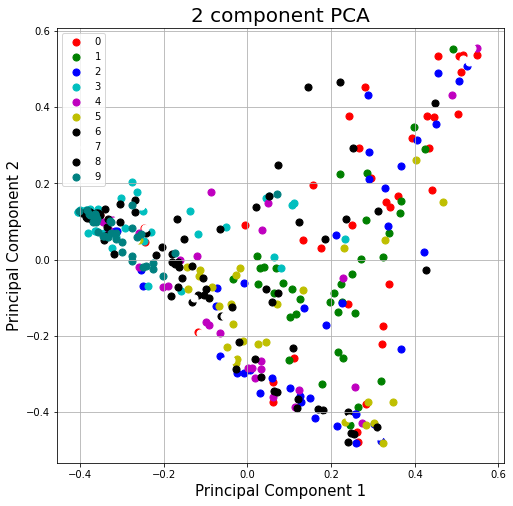

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(10)
colors = ['r', 'g', 'b', 'c','m','y','k','w','black','teal']
for target, color in zip(targets,colors):
    indicesToKeep = pd.Series(y_train_flatted) == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#Approche Word2Vect

Load model and test it

In [ ]:
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use
model.most_similar("cat")

[==================================================] 100.0% 104.8/104.8MB downloaded


[('dog', 0.9590819478034973),
 ('monkey', 0.9203578233718872),
 ('bear', 0.9143137335777283),
 ('pet', 0.9108031392097473),
 ('girl', 0.8880630135536194),
 ('horse', 0.8872727155685425),
 ('kitty', 0.8870542049407959),
 ('puppy', 0.886769711971283),
 ('hot', 0.8865255117416382),
 ('lady', 0.8845518827438354)]

In [ ]:
def get_word_features(word):
  try:
    return model.get_vector(word)
  except:
    return  np.zeros(25)


In [ ]:
model.get_vector("car")

25

In [ ]:
def encode_sentence(sentence):
    """
    get representation of each word and sum it to make representation of a sentence
    """
    ls_words = sentence.split(" ") 
    encoded = np.array([get_word_features(word) for word in ls_words])
    feature = encoded.sum(axis=0)
    return feature
    

In [ ]:
encoded_sentences = [encode_sentence(sentence)  for sentence in sentences]

In [ ]:
len(encoded_sentences)

543

In [ ]:
len(encoded_sentences[0])

25

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_sentences, y_bag, test_size=0.33, random_state=42)

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
clf = CV_rfc.best_estimator_

In [ ]:
clf.score(X_test, y_test)

0.4166666666666667

In [ ]:
clf.score(X_train, y_train)

0.9972451790633609

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lr.score(X_train, y_train)

0.5950413223140496

In [ ]:
lr.score(X_test, y_test)

0.55

### Finally, the best extractor seems to be Bag of word with a performance of 0.69 on the test, this is then the method chosen to get text representation